## Author: Kunal Sadana

## The Sparks Foundation (Graduate Rotational Internship Program) - TASK 2

## <font color=red> Problem Statement

From the given 'Iris' dataset, predict the optimal number of clusters and represent it visually

## <font color=red> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

## <font color=red> Step 1: Data Reading and Understanding

In [3]:
# load data
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
# display top 5 rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# no. of rows and columns
iris.shape

(150, 4)

In [6]:
# df info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# statistical analysis of numeric columns
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## <font color=red> Step 2: Data Cleaning

In [8]:
# check NULL values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

> **Insights:**
    No NULL values

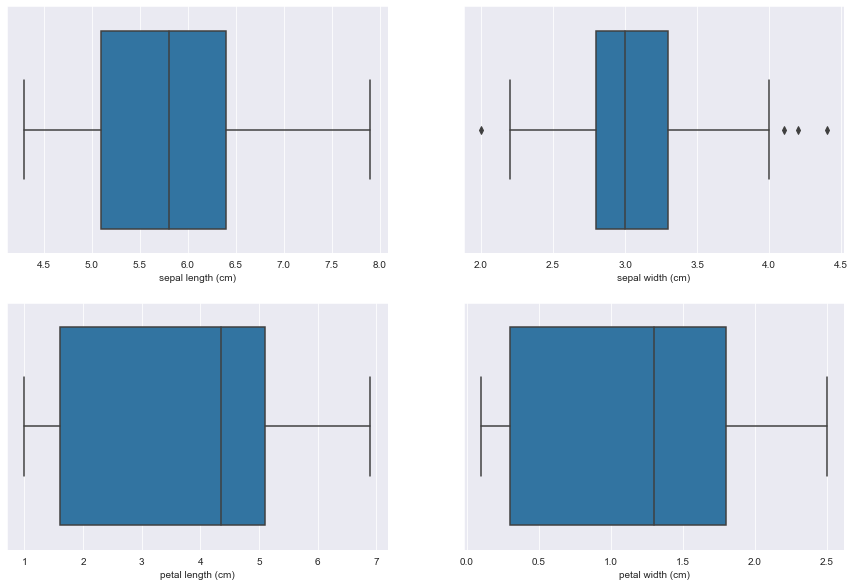

In [9]:
# boxplot to check outliers
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
for i,v in enumerate(iris.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(iris[v])

> **Insights:**
    Sepal width shows few outliers but no treatment necessary here

## <font color=red> Step 3: Data Visualisation

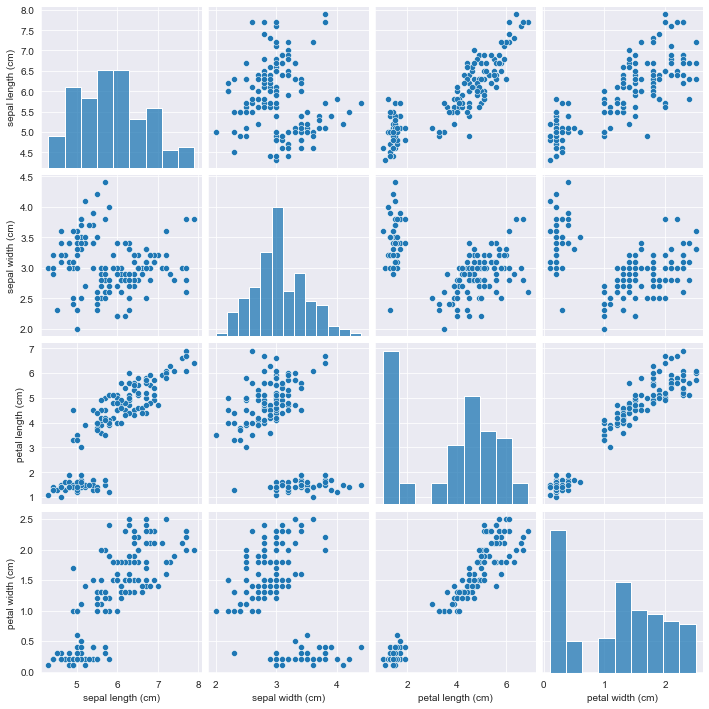

In [10]:
# pairplot of numerical variables
sns.pairplot(iris)
plt.show()

In [11]:
# making a correlation table
corr_df = iris.corr()
corr_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


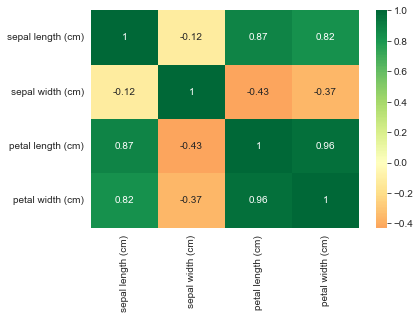

In [12]:
# draw a heatmap showing correlations
sns.heatmap(corr_df, annot=True, cmap='RdYlGn', center=0)
plt.show()

## <font color=red> Step 4: Data Preparation

### <font color=blue> Standardisation

In [13]:
# import library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # create object

# rescaling using fit_transform
iris_scaled = pd.DataFrame(scaler.fit_transform(iris))
iris_scaled.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [14]:
# check the statistics of scaled df
iris_scaled.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


### <font color=blue> Clustering Tendency
- Process to evaluate the data to check if data is feasible for clustering
- We go for Hopkin's Statistics test

In [15]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(iris_scaled)

0.8269793431058322

## <font color=red> Step 5: Modeling

### <font color=blue> Finding Optimal Number of Clusters

### <font color=brown> WCSS/Elbow Curve Method
- For each value of number of clusters, we calculate WCSS (Within Cluster Sum of Squares), also called inertia
- We draw a curve of Inertia vs number of clusters, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

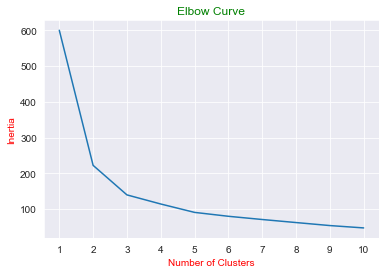

In [17]:
wcss=[]
range_n_clusters = [i for i in range(1,11)]  # list of number of clusters to be checked for

# initiating a loop to calculate inertia score for different number of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter=50, random_state=0)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)

# plotting the elbow curve to find optimal number of clusters    
sns.lineplot(x=range_n_clusters, y=wcss)
plt.title('Elbow Curve', color='g')
plt.xlabel('Number of Clusters', color='r')
plt.xticks(ticks=range_n_clusters)
plt.ylabel('Inertia', color='r')
plt.show()

### <font color=brown> Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [18]:
# import library
from sklearn.metrics import silhouette_score

range_n_clusters = [i for i in range(2,11)]  # list of number of clusters to be checked for

s_score=[]
# initiating a loop to calculate inertia score for different number of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter=50, random_state=0)
    kmeans.fit(iris_scaled)
    
    s_avg = silhouette_score(iris_scaled, kmeans.labels_)
    s_score.append(s_avg)

# creating a df to show silhouette score for different number of clusters
s_score_df = pd.DataFrame({'num_clusters':range_n_clusters, 'silhouette_score':s_score})
s_score_df

,num_clusters,silhouette_score
0,2,0.581750
1,3,0.459948
2,4,0.385045
3,5,0.345901
4,6,0.322037
5,7,0.327694
6,8,0.340617
7,9,0.347139
8,10,0.361405


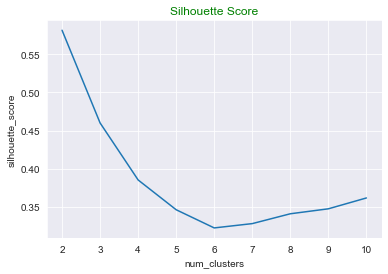

In [19]:
# graph showing the silhouette score for different number of clusters
sns.lineplot(data=s_score_df, x='num_clusters', y='silhouette_score')
plt.title('Silhouette Score', color='g')
plt.show()

> **Insights:**
Looking at both Both Elbow Curve and Silhouette Analysis we take the optimal number of clusters as 3

### <font color=blue> Making the Model

In [20]:
# final model with num_clusters=3
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=50, random_state=0)
kmeans.fit(iris_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [21]:
# assign the labels
iris['cluster_id'] = kmeans.labels_
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [26]:
iris.cluster_id.value_counts()

0    53
1    50
2    47
Name: cluster_id, dtype: int64

### <font color=blue> Visualising the Model

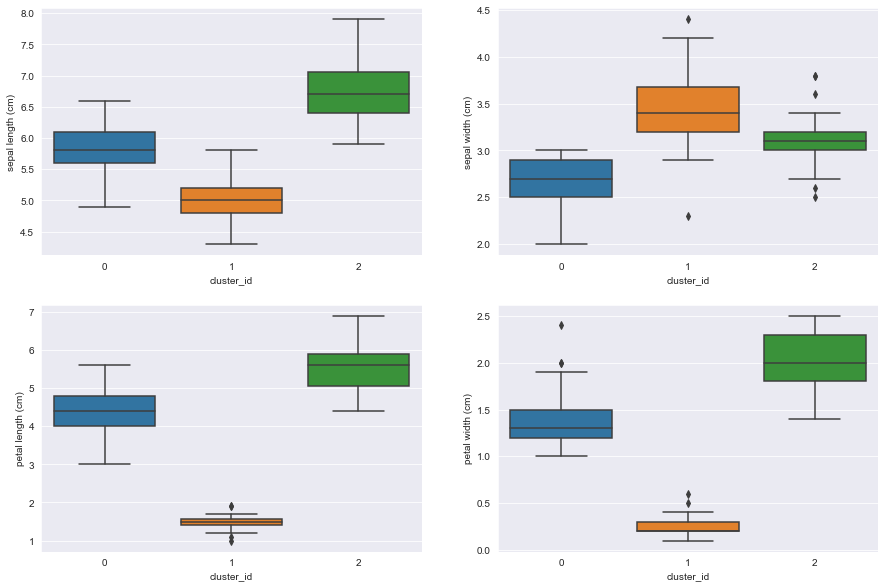

In [22]:
# boxplot
plt.figure(figsize=(15,10))

for i,v in enumerate(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=iris[v], x=iris.cluster_id)

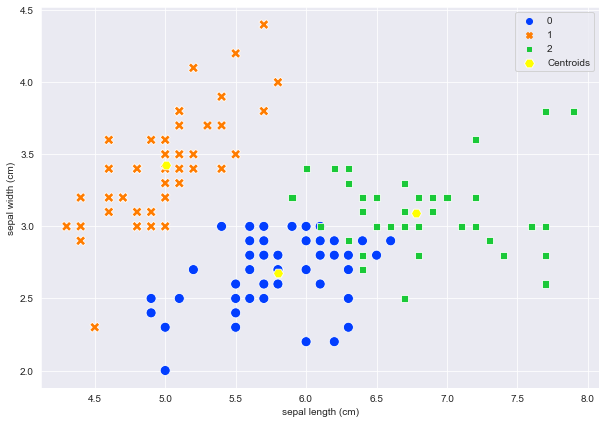

In [23]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7))

# clusters
sns.scatterplot(data=iris, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_id', style='cluster_id', 
                s=100, palette='bright')

# centroids of clusters
centroid = scaler.inverse_transform(kmeans.cluster_centers_) # array containing centroid
sns.scatterplot(centroid[:,0], centroid[:,1], color='yellow', s=100, label='Centroids', marker='H')
plt.show()

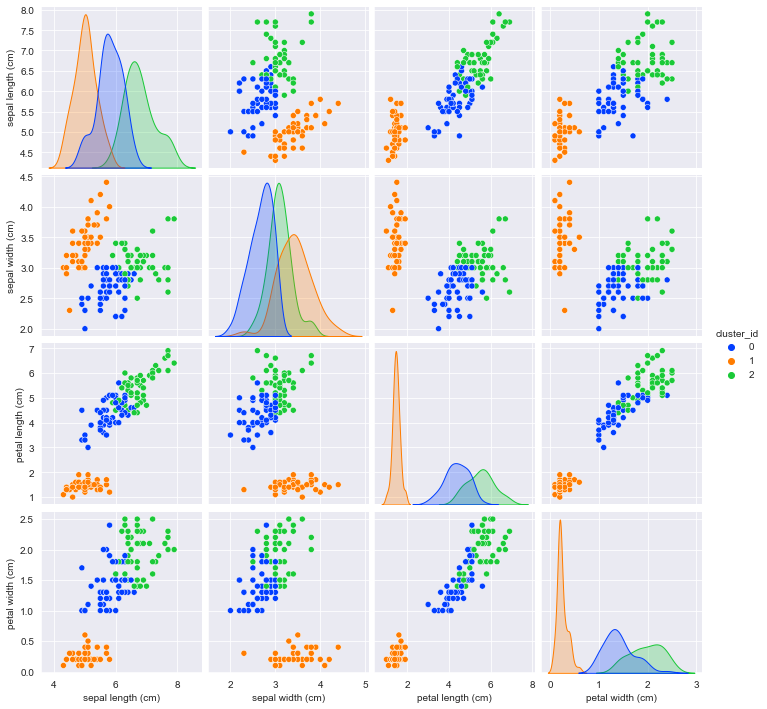

In [24]:
# pairplot
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

sns.pairplot(data=iris, x_vars=cols, y_vars=cols, hue='cluster_id',palette='bright')

plt.show()

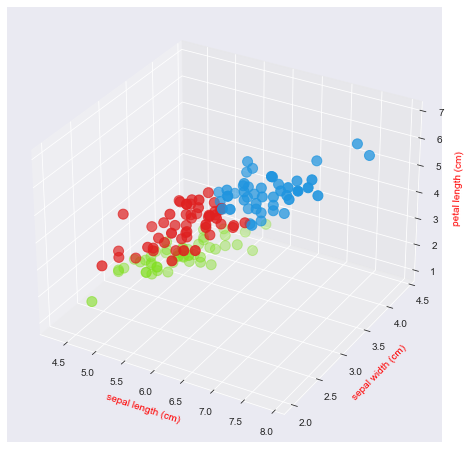

In [25]:
# 3D plot
# 1st 3 columns
fig = plt.figure(figsize=(8,8))

colors = ['#DF2020', '#81DF20', '#2095DF']
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# assigning x,y,z variables
x = iris['sepal length (cm)']
y = iris['sepal width (cm)']
z = iris['petal length (cm)']
c = iris.cluster_id.map({0:colors[0], 1:colors[1], 2:colors[2]})

ax.scatter(x,y,z,c=c, s=100)

ax.set_xlabel('sepal length (cm)', color='r')
ax.set_ylabel('sepal width (cm)', color='r')
ax.set_zlabel('petal length (cm)', color='r')
plt.show()